# Introduction

Kelompok 4 : - Alifina Aulia Azzahra
             - Wanwha Sonia Putri Artha Soetjianto

Latar Belakang :
    Penyakit kardiovaskular (CVDs) merupakan penyebab kematian nomor 1 di dunia. Pada umumnya CVDs menyebabkan gagal jantung. Gagal jantung dipengaruhi oleh beberapa faktor seperti usia, gender dan penyakit bawaan.Untuk memprediksi kelangsungan hidup penderita gagal jantung maka pada project ini dilakukan klasifikasi dengan menggunakna model ensemble.Data yang digunakan memiliki 13 atribut dengan 299 observasi

# Import Library

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings
import pickle
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [122]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = 'white'

# Data Loading

In [123]:
# membaca dataset yang disimpan dalam bentuk csv
df= pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [124]:
# menampilkan 20 baris teratas dataset
df.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


creatinine_phosphokinase (CPK) merupakan enzim yang banyak ditemukakn dalam otot rangka dan jantung. Tes CPK digunakan untuk mendiagnosis serangan jantung. Nilai normal CPK berkisar antara 10-120 mcg/L.

ejection_fraction merupakan presentase darah yang meninggalkan jantung setiap kontraksi jantung. ejection_fraction yang kurang dari 40% menandakan jantung tidak memompa darah dengan cukup baik atau dapat beresiko gagal jantung.

platelets adalah komponen darah berupa fragmen sitoplasma megakariosit tidak berinti yang memiliki ukuran lebih kecil dari sel darah putih dan merah. Jumlah platelet normal sekitar 150.000 hingga 450.000 per microliter darah.

serum_creatinine adalah sampah hasil metabolisme otot yang mengalir dalam sirkulasi darah. Pada laki-laki dewasa kadar normal serum_creatinine adalah 0,74 hingga 1,35 mg/dl. Pada perempuan dewasa sekitar 0,59 hingga 1,04 mg/dl.

serum_sodium adalah kadar natrium serum yang digunakan untuk menilai tonisitas serum yang sering terganggu akibat hiperglikemia.

In [125]:
# mengetahui tipe kolom dan jumlah nilai null pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Oleh karena itu ada beberapa tipe kolom yang harus diubah yaitu :
- tipe data pada kolom age diubah menjadi integer
- anaemia, diabetes, high_blood_pressure, smoking dan 'DEATH_EVENT' diubah menjadi kategorik dengan nilai 'yes' atau 'no'
- sex diubah menjadi kategorik dengan nilai 'male' atau 'female'

In [126]:
# mengetahui nilai dari statistik deskripstif dataset
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Dari statistik deskriptif tersebut diperoleh informasi hawa rata-rata penderita penyakit jantung memiliki kadar CPK sekitar 581,84. Hal tersebut menunjukkan bahwa ada missing value pada pengukuran sehingga ditemukan kadar CPK sebesar lebih dari 1000.

In [127]:
# mengetahui jumlah kadar creatinine_phosphokinase lebih dari 1000
df.loc[df['creatinine_phosphokinase']>1000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1 to 297
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       36 non-null     float64
 1   anaemia                   36 non-null     int64  
 2   creatinine_phosphokinase  36 non-null     int64  
 3   diabetes                  36 non-null     int64  
 4   ejection_fraction         36 non-null     int64  
 5   high_blood_pressure       36 non-null     int64  
 6   platelets                 36 non-null     float64
 7   serum_creatinine          36 non-null     float64
 8   serum_sodium              36 non-null     int64  
 9   sex                       36 non-null     int64  
 10  smoking                   36 non-null     int64  
 11  time                      36 non-null     int64  
 12  DEATH_EVENT               36 non-null     int64  
dtypes: float64(3), int64(10)
memory usage: 3.9 KB


Ada sebanyak 36 pengamatan dari 299 pengamatan yang memiliki nilai CPK>1000. 36 pengamatan tersebut akan dihapus dari dataset

# Data Cleaning

In [128]:
# mengubah tipe data age menjadi integer
df.age= df.age.astype(int)

In [129]:
# mengubah nama kolom DEATH_EVENT
df.rename(columns={'DEATH_EVENT':'patient_dead'}, inplace=True)

In [130]:
# mengubah tipedata kolom kategorik
df['anaemia']= np.where(df['anaemia']==1, 'Yes', 'No')
df['diabetes']= np.where(df['diabetes']==1, 'Yes', 'No')
df['high_blood_pressure']= np.where(df['high_blood_pressure']==1, 'Yes', 'No')
df['smoking']= np.where(df['smoking']==1, 'Yes', 'No')
df['patient_dead']= np.where(df['patient_dead']==1, 'Yes', 'No')

df['sex'] = np.where(df['sex'] == 1, 'Male','Female')

In [131]:
# mengubah platelet dalam satuan mcl
df.platelets = (df. platelets/1000).astype(int) 

In [132]:
# melihat perubahan tipe data pada setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int32  
 1   anaemia                   299 non-null    object 
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    object 
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    object 
 6   platelets                 299 non-null    int32  
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    object 
 11  time                      299 non-null    int64  
 12  patient_dead              299 non-null    object 
dtypes: float64(1), int32(2), int64(4), object(6)
memory usage: 28.2+ 

In [133]:
# menghapus baris yang memiliki kadar creatinine_phosphokinase>1000
df.drop(df[df.creatinine_phosphokinase>1000].index, inplace=True)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       263 non-null    int32  
 1   anaemia                   263 non-null    object 
 2   creatinine_phosphokinase  263 non-null    int64  
 3   diabetes                  263 non-null    object 
 4   ejection_fraction         263 non-null    int64  
 5   high_blood_pressure       263 non-null    object 
 6   platelets                 263 non-null    int32  
 7   serum_creatinine          263 non-null    float64
 8   serum_sodium              263 non-null    int64  
 9   sex                       263 non-null    object 
 10  smoking                   263 non-null    object 
 11  time                      263 non-null    int64  
 12  patient_dead              263 non-null    object 
dtypes: float64(1), int32(2), int64(4), object(6)
memory usage: 26.7+ 

Jadi data yang akan dianalis dan digunakan untuk membuat model sebanyak 263 observasi.

In [135]:
# memeriksa nama kolom
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'patient_dead'],
      dtype='object')

In [136]:
# memeriksa kolom duplikat
df.duplicated().any()

False

In [137]:
heart_failure= df.copy()

In [138]:
heart_failure.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,61.262357,310.882129,38.167300,263.087452,1.394981,136.551331,127.060837
std,12.051559,247.586143,12.039794,95.974929,0.995056,4.288747,77.440719
min,40.000000,23.000000,14.000000,25.000000,0.600000,116.000000,4.000000
25%,51.500000,109.000000,30.000000,210.000000,0.900000,134.000000,69.500000
50%,60.000000,211.000000,38.000000,262.000000,1.100000,137.000000,110.000000
75%,70.000000,582.000000,45.000000,303.500000,1.450000,140.000000,200.500000
max,95.000000,981.000000,80.000000,850.000000,9.400000,148.000000,285.000000


In [139]:
heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       263 non-null    int32  
 1   anaemia                   263 non-null    object 
 2   creatinine_phosphokinase  263 non-null    int64  
 3   diabetes                  263 non-null    object 
 4   ejection_fraction         263 non-null    int64  
 5   high_blood_pressure       263 non-null    object 
 6   platelets                 263 non-null    int32  
 7   serum_creatinine          263 non-null    float64
 8   serum_sodium              263 non-null    int64  
 9   sex                       263 non-null    object 
 10  smoking                   263 non-null    object 
 11  time                      263 non-null    int64  
 12  patient_dead              263 non-null    object 
dtypes: float64(1), int32(2), int64(4), object(6)
memory usage: 26.7+ 

Saat ini, dataset siap digunakan untuk melakukan analisis

# Exploratory Data Analysis (EDA)

### Mengetahui sebaran data numerik penderita gagal jantung

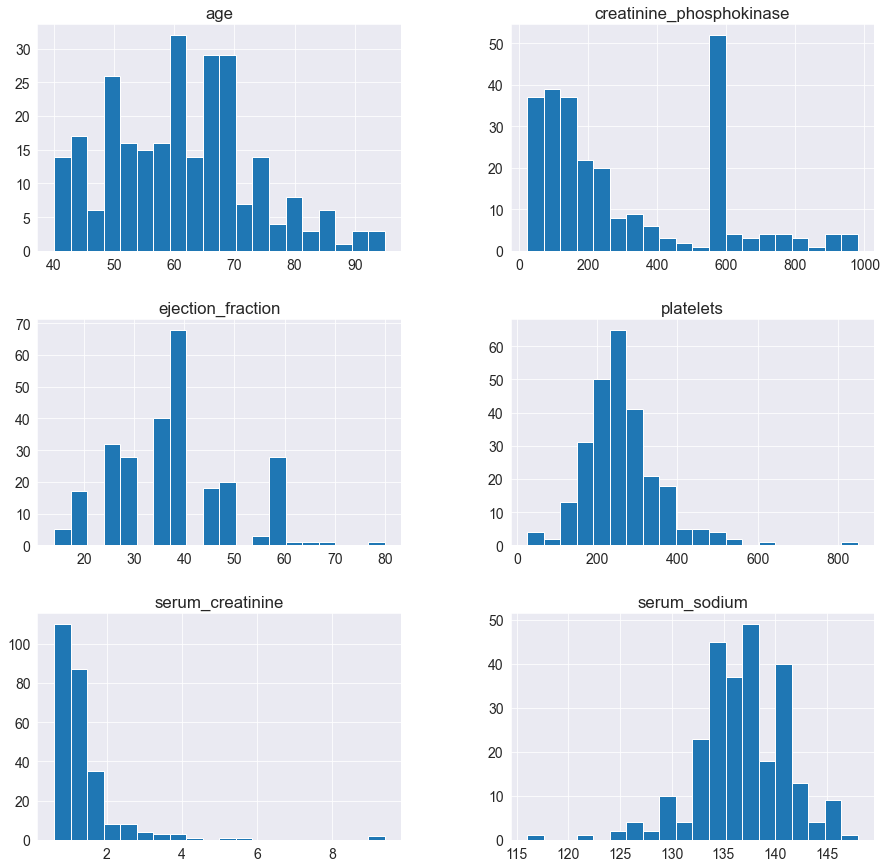

In [140]:
heart_failure[['age', 'creatinine_phosphokinase', 
    'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']].hist(bins=20,
                                                                               figsize=(15, 15))
plt.show()

In [141]:
heart_failure[['age', 'creatinine_phosphokinase', 
    'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,61.262357,310.882129,38.167300,263.087452,1.394981,136.551331
std,12.051559,247.586143,12.039794,95.974929,0.995056,4.288747
min,40.000000,23.000000,14.000000,25.000000,0.600000,116.000000
25%,51.500000,109.000000,30.000000,210.000000,0.900000,134.000000
50%,60.000000,211.000000,38.000000,262.000000,1.100000,137.000000
75%,70.000000,582.000000,45.000000,303.500000,1.450000,140.000000
max,95.000000,981.000000,80.000000,850.000000,9.400000,148.000000


Penderita gagal jantung paling banyak berusia 60 tahun, mayoritas memiliki kadar CPK sebesar 600, dan ejection_fraction 40%, jumlah platelet antara 200-400, kadar serum keratin kurang dari 2 dan kadar serum sodium antara 135-140.

### mengetahui kriteria keslamatan penderita gagal jantung

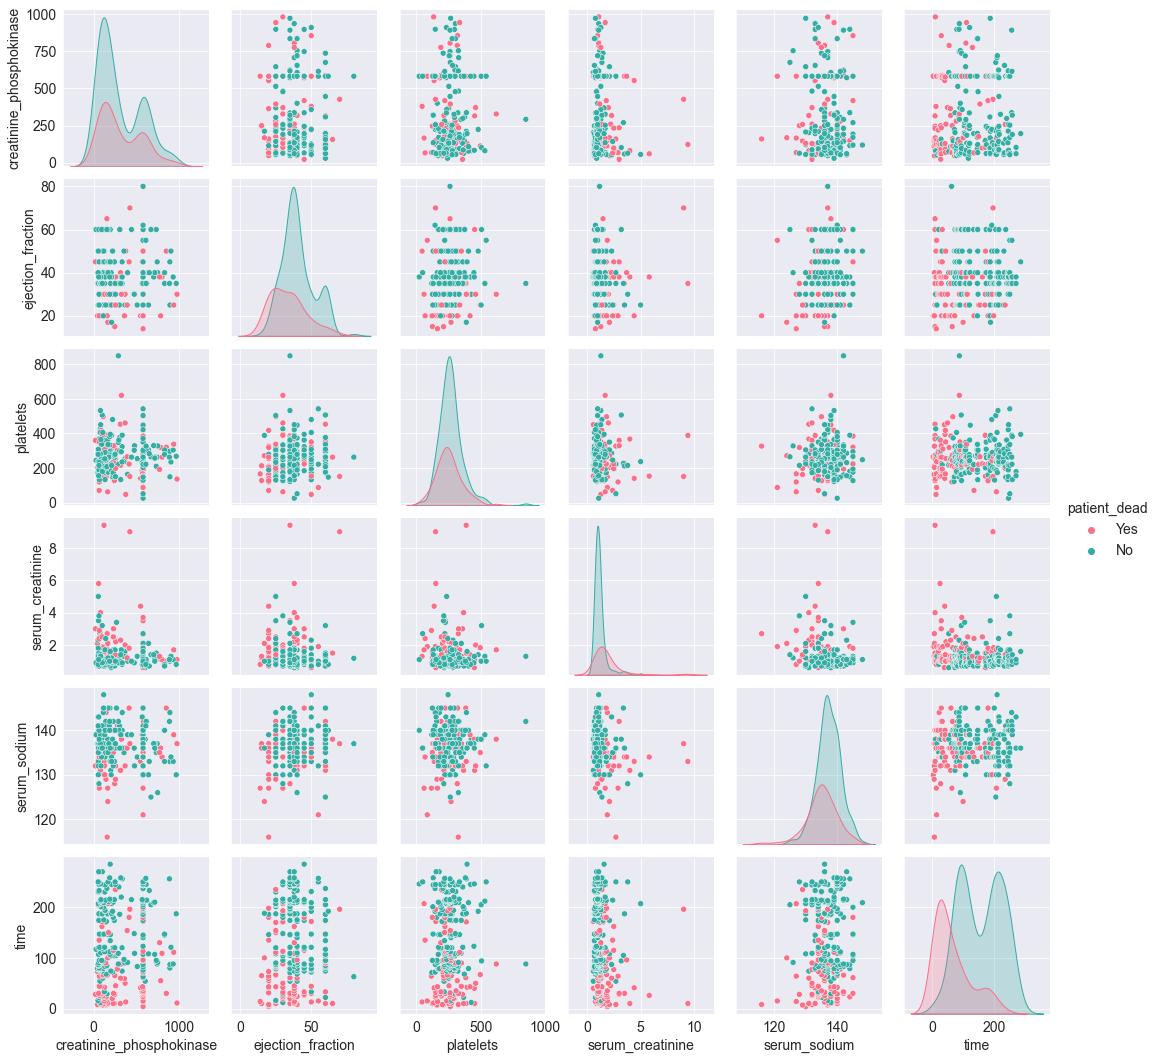

In [142]:
sns.pairplot(heart_failure[["creatinine_phosphokinase", "ejection_fraction",
                       "platelets", "serum_creatinine",
                       "serum_sodium", "time", "patient_dead"]], hue = "patient_dead", 
            diag_kind='kde', kind='scatter', palette='husl')
plt.show()

In [143]:
y =heart_failure.groupby("patient_dead")["creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"].agg([np.mean, np.median])
y

creatinine_phosphokinase        ejection_fraction         \
                                 mean median              mean median   
patient_dead                                                            
No                         305.649718  200.0         40.367232   38.0   
Yes                        321.651163  234.0         33.639535   30.0   

               platelets        serum_creatinine        serum_sodium         \
                    mean median             mean median         mean median   
patient_dead                                                                  
No            267.593220  263.0         1.177797    1.0   137.271186  137.0   
Yes           253.813953  248.5         1.841977    1.4   135.069767  135.0   

                    time         
                    mean median  
patient_dead                     
No            156.570621  148.0  
Yes            66.325581   43.0

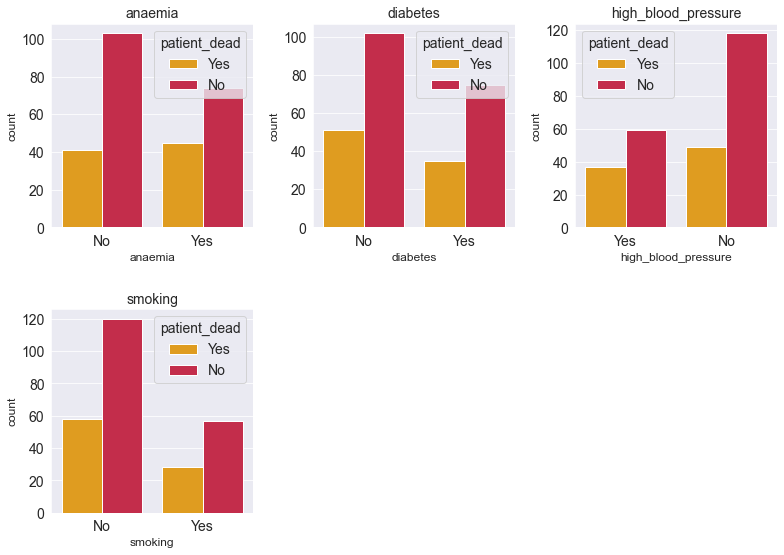

In [144]:
binary_var = ['anaemia', 'diabetes', 'high_blood_pressure','smoking']
plt.figure(figsize=(13, 9))
for i, var in enumerate(binary_var):
    plt.subplot(2, 3, i+1)
    plt.title(var, fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.subplots_adjust(hspace = 0.4, wspace = 0.3)
    sns.countplot(data= heart_failure, x = var, hue="patient_dead", palette = ['orange', 'crimson'])

diagram diatas menunjukkan bahwa penderita gagal jantung yang memiliki penyakit bawaan berupa anemia, diabetes, tekanan darah tinggi dan pecandu rokok memiliki peluang tidak selamat lebih besar.

In [145]:
dead_count= heart_failure.patient_dead.value_counts()

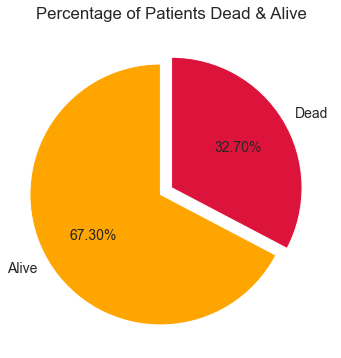

In [146]:
plt.figure(figsize = (12, 6))
plt.pie(dead_count, labels = ["Alive", "Dead"], autopct = '%.2f%%', startangle = 90, colors = ['orange', 'crimson'], explode=[0.1, 0],)
plt.title("Percentage of Patients Dead & Alive");

Diagram pie tersebut menginformasikan bahwa 67,30% penderita gagal jantung dapat selamat. Tindak lanjut pasien gagal jantung berbeda-beda. Merokok merupakan salah satu faktor yang membedakan durasi pengobatan pasien gagal jantung

### Mengetahui durasi tindak lanjut pasien gagal jantung yang merokok dan tidak merokok

In [147]:
heart_failure.smoking.value_counts()

No     178
Yes     85
Name: smoking, dtype: int64

In [148]:
heart_failure.sex.value_counts()

Male      168
Female     95
Name: sex, dtype: int64

Dataset menunjukkan bahwa mayoritas penderita gagal jantung merupakan perokok dan mayoritas penderita adalah laki-laki

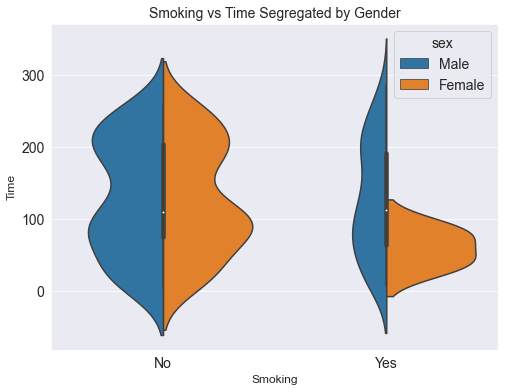

In [149]:
plt.figure(figsize=(8, 6))
a=sns.violinplot(x=heart_failure.smoking, y=heart_failure.time, hue=df.sex, split=True)
plt.title("Smoking vs Time Segregated by Gender", fontsize=14)
plt.xlabel("Smoking", fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.show()

Diperoleh informasi bahwa durasi tindak lanjut pasien bukan perokok laki-laki dan perempuan sama. Namun, pasien laki-laki perokok memilki durasi tindak lanjut lebih lama dibandingkan pasien perokok perempuan

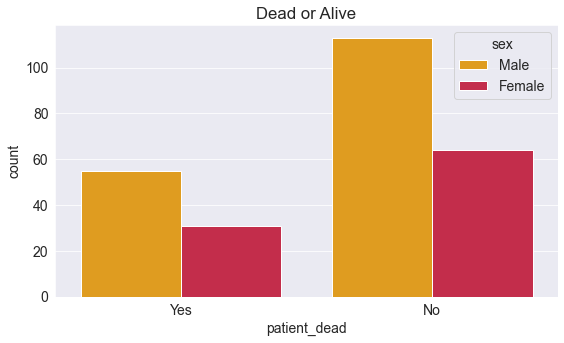

In [150]:
plt.title('Dead or Alive')
plt.xlabel('Patient Dead')
plt.ylabel('Number of Patients');
sns.countplot(x = heart_failure.patient_dead, hue = heart_failure.sex, palette = ['orange', 'crimson']); 

# Data Preprocessing

In [151]:
heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,patient_dead
0,75,No,582,No,20,Yes,265,1.9,130,Male,No,4,Yes
2,65,No,146,No,20,No,162,1.3,129,Male,Yes,7,Yes
3,50,Yes,111,No,20,No,210,1.9,137,Male,No,7,Yes
4,65,Yes,160,Yes,20,No,327,2.7,116,Female,No,8,Yes
5,90,Yes,47,No,40,Yes,204,2.1,132,Male,Yes,8,Yes


## Label Encoding

In [152]:
from sklearn.preprocessing import LabelEncoder

In [153]:
le = LabelEncoder()
heart_failure.anaemia = le.fit_transform(heart_failure.anaemia)
heart_failure.diabetes = le.fit_transform(heart_failure.diabetes)
heart_failure.high_blood_pressure = le.fit_transform(heart_failure.high_blood_pressure)
heart_failure.sex = le.fit_transform(heart_failure.sex)
heart_failure.smoking = le.fit_transform(heart_failure.smoking)
heart_failure.patient_dead = le.fit_transform(heart_failure.patient_dead)

In [154]:
heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,patient_dead
0,75,0,582,0,20,1,265,1.9,130,1,0,4,1
2,65,0,146,0,20,0,162,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327,2.7,116,0,0,8,1
5,90,1,47,0,40,1,204,2.1,132,1,1,8,1


In [155]:
heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       263 non-null    int32  
 1   anaemia                   263 non-null    int32  
 2   creatinine_phosphokinase  263 non-null    int64  
 3   diabetes                  263 non-null    int32  
 4   ejection_fraction         263 non-null    int64  
 5   high_blood_pressure       263 non-null    int32  
 6   platelets                 263 non-null    int32  
 7   serum_creatinine          263 non-null    float64
 8   serum_sodium              263 non-null    int64  
 9   sex                       263 non-null    int32  
 10  smoking                   263 non-null    int32  
 11  time                      263 non-null    int64  
 12  patient_dead              263 non-null    int32  
dtypes: float64(1), int32(8), int64(4)
memory usage: 20.5 KB


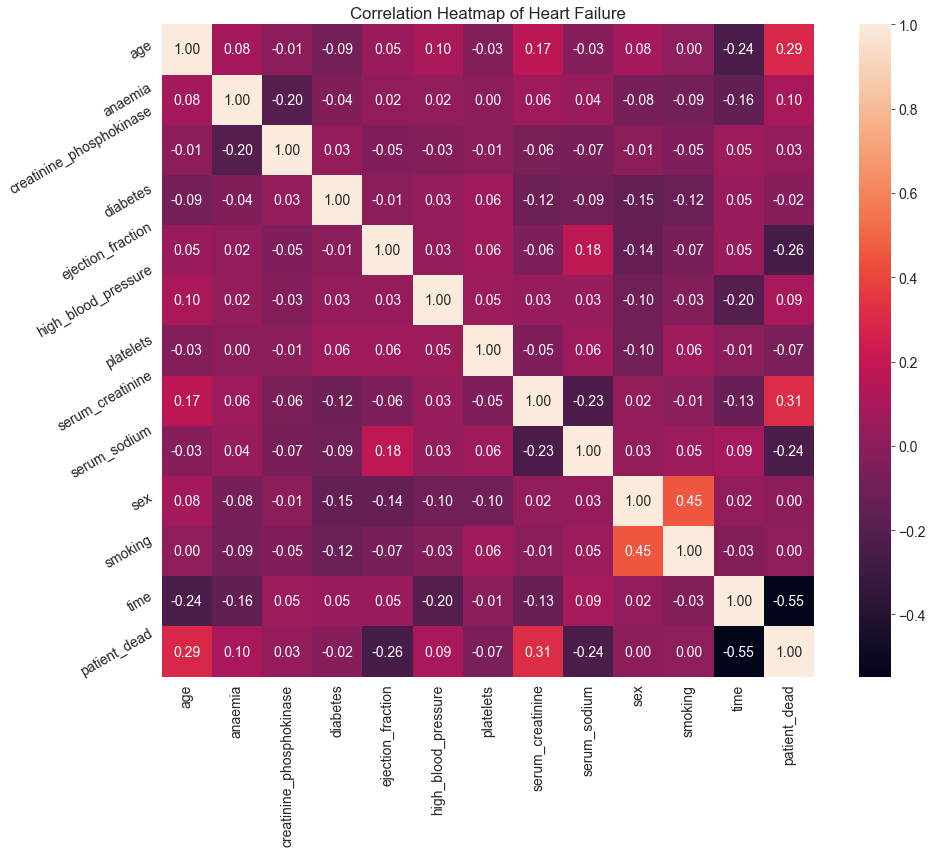

In [156]:
correlation = heart_failure.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Heart Failure')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

## Splitting dataset

In [157]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

In [158]:
x = heart_failure.drop("patient_dead", axis=1)
y = heart_failure.patient_dead

In [159]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75,0,582,0,20,1,265,1.9,130,1,0,4
2,65,0,146,0,20,0,162,1.3,129,1,1,7
3,50,1,111,0,20,0,210,1.9,137,1,0,7
4,65,1,160,1,20,0,327,2.7,116,0,0,8
5,90,1,47,0,40,1,204,2.1,132,1,1,8


In [160]:
y.head()

0    1
2    1
3    1
4    1
5    1
Name: patient_dead, dtype: int32

In [161]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [162]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.25)

In [163]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y, test_size=0.05)

In [164]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(x, y, test_size=0.05)

# Defining the Model

In [165]:
import time
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [166]:
# Random Forest
rf = RandomForestClassifier()

In [167]:
# Boosting Method
gbm = GradientBoostingClassifier(learning_rate=0.01, random_state=1)
lr_boosting = AdaBoostClassifier(LogisticRegression(C=10000, solver='lbfgs'), n_estimators=100, learning_rate = 0.1)
svm_boosting = AdaBoostClassifier(SVC(C=100000, gamma='scale', probability=True), n_estimators=100, learning_rate = 0.1)

# Model Training

In [168]:
# Random Forest
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [169]:
gbm.fit(x_train2, y_train2)
y_pred_gbm = gbm.predict(x_test2)

In [170]:
# Logistic Regression
lr_boosting.fit(x_train3, y_train3)
y_pred_lr = lr_boosting.predict(x_test3)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [171]:
# SVM
svm_boosting.fit(x_train4, y_train4)
y_pred_svm = svm_boosting.predict(x_test4)

# Model Evaluation

In [172]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score

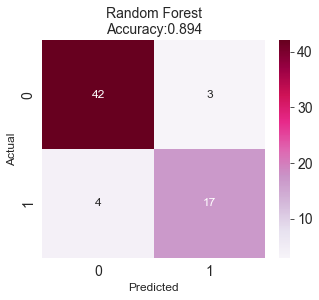

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92        45
           1       0.85      0.81      0.83        21

    accuracy                           0.89        66
   macro avg       0.88      0.87      0.88        66
weighted avg       0.89      0.89      0.89        66

Accuracy Score: 0.8939393939393939
Precision Score: 0.85
Recall Score: 0.8095238095238095
F1 Score: 0.8292682926829269


In [173]:
# Random Forest
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Random Forest\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_rf)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

print(f'Accuracy Score: {accuracy_score(y_test, y_pred_rf)}')
print(f'Precision Score: {precision_score(y_test,y_pred_rf)}')
print(f'Recall Score: {recall_score(y_test,y_pred_rf)}')
print("F1 Score:",f1_score(y_test,y_pred_rf))

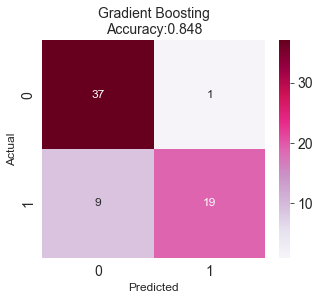

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88        38
           1       0.95      0.68      0.79        28

    accuracy                           0.85        66
   macro avg       0.88      0.83      0.84        66
weighted avg       0.87      0.85      0.84        66

Accuracy Score: 0.8484848484848485
Precision Score: 0.95
Recall Score: 0.6785714285714286
F1 Score: 0.7916666666666667


In [174]:
# Gradient Boosting 
cm = confusion_matrix(y_test2, y_pred_gbm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Gradient Boosting\nAccuracy:{:.3f}".format(accuracy_score(y_test2, y_pred_gbm)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test2, y_pred_gbm))

print(f'Accuracy Score: {accuracy_score(y_test2, y_pred_gbm)}')
print(f'Precision Score: {precision_score(y_test2,y_pred_gbm)}')
print(f'Recall Score: {recall_score(y_test2,y_pred_gbm)}')
print("F1 Score:",f1_score(y_test2,y_pred_gbm))

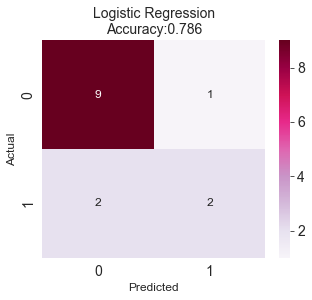

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.67      0.50      0.57         4

    accuracy                           0.79        14
   macro avg       0.74      0.70      0.71        14
weighted avg       0.77      0.79      0.78        14

Accuracy Score: 0.7857142857142857
Precision Score: 0.6666666666666666
Recall Score: 0.5
F1 Score: 0.5714285714285715


In [175]:
# Logistic Regression
cm = confusion_matrix(y_test3, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Logistic Regression\nAccuracy:{:.3f}".format(accuracy_score(y_test3, y_pred_lr)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test3, y_pred_lr))

print(f'Accuracy Score: {accuracy_score(y_test3, y_pred_lr)}')
print(f'Precision Score: {precision_score(y_test3,y_pred_lr)}')
print(f'Recall Score: {recall_score(y_test3,y_pred_lr)}')
print("F1 Score:",f1_score(y_test3,y_pred_lr))

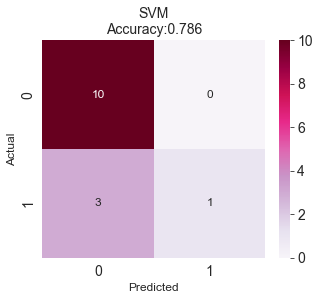

Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.25      0.40         4

    accuracy                           0.79        14
   macro avg       0.88      0.62      0.63        14
weighted avg       0.84      0.79      0.74        14

Accuracy Score: 0.7857142857142857
Precision Score: 1.0
Recall Score: 0.25
F1 Score: 0.4


In [176]:
# SVM
cm = confusion_matrix(y_test4, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("SVM\nAccuracy:{:.3f}".format(accuracy_score(y_test4, y_pred_svm)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test4, y_pred_svm))

print(f'Accuracy Score: {accuracy_score(y_test4, y_pred_svm)}')
print(f'Precision Score: {precision_score(y_test4,y_pred_svm)}')
print(f'Recall Score: {recall_score(y_test4,y_pred_svm)}')
print("F1 Score:",f1_score(y_test4,y_pred_svm))

# Membangun Model Random Forest Baru

In [177]:
from sklearn.preprocessing import StandardScaler

In [178]:
heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       263 non-null    int32  
 1   anaemia                   263 non-null    int32  
 2   creatinine_phosphokinase  263 non-null    int64  
 3   diabetes                  263 non-null    int32  
 4   ejection_fraction         263 non-null    int64  
 5   high_blood_pressure       263 non-null    int32  
 6   platelets                 263 non-null    int32  
 7   serum_creatinine          263 non-null    float64
 8   serum_sodium              263 non-null    int64  
 9   sex                       263 non-null    int32  
 10  smoking                   263 non-null    int32  
 11  time                      263 non-null    int64  
 12  patient_dead              263 non-null    int32  
dtypes: float64(1), int32(8), int64(4)
memory usage: 20.5 KB


In [179]:
heart_failure_new= heart_failure[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'smoking', 'time']]

In [180]:
scaler_ = StandardScaler()
scaler_.fit(heart_failure_new)
scaled_features_ = scaler_.transform(heart_failure_new)
heart_failure_feat_ = pd.DataFrame(scaled_features_, columns= heart_failure_new.columns)
heart_failure_feat_.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time
0,1.142079,-0.909059,1.097132,-0.847912,-1.511815,1.318933,0.019966,0.508496,-1.530475,-0.691034,-1.592127
1,0.310729,-0.909059,-0.667228,-0.847912,-1.511815,-0.758189,-1.055278,-0.095635,-1.764088,1.447107,-1.553314
2,-0.936296,1.100038,-0.808863,-0.847912,-1.511815,-0.758189,-0.554193,0.508496,0.104815,-0.691034,-1.553314
3,0.310729,1.100038,-0.610575,1.179368,-1.511815,-0.758189,0.667199,1.314003,-4.801056,-0.691034,-1.540376
4,2.389105,1.100038,-1.067852,-0.847912,0.152510,1.318933,-0.616829,0.709873,-1.063250,1.447107,-1.540376


In [181]:
heart_failure_final_ = heart_failure_feat_.copy()

In [182]:
X = heart_failure_final_ 
Y = heart_failure.patient_dead

In [183]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.25, random_state=0)

In [184]:
rf.fit(X_train1, Y_train1)
y_pred_rf = rf.predict(X_test1)

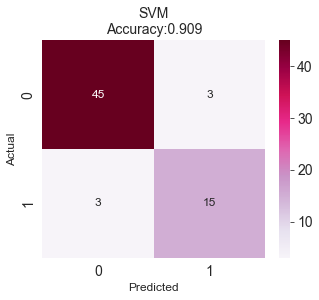

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        48
           1       0.83      0.83      0.83        18

    accuracy                           0.91        66
   macro avg       0.89      0.89      0.89        66
weighted avg       0.91      0.91      0.91        66

Accuracy Score:- 0.9090909090909091
Precision Score:- 0.8333333333333334
Recall Score:- 0.8333333333333334
F1 Score: 0.8333333333333334


In [185]:
cm = confusion_matrix(Y_test1, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("SVM\nAccuracy:{:.3f}".format(accuracy_score(Y_test1, y_pred_rf)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(Y_test1, y_pred_rf))

print(f'Accuracy Score:- {accuracy_score(Y_test1, y_pred_rf)}')
print(f'Precision Score:- {precision_score(Y_test1,y_pred_rf)}')
print(f'Recall Score:- {recall_score(Y_test1,y_pred_rf)}')
print("F1 Score:",f1_score(Y_test1,y_pred_rf))

# Model Inference

In [186]:
from sklearn.preprocessing import StandardScaler

In [187]:
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [188]:
scaler_ = StandardScaler()
scaler_.fit(x_train, y_train);

In [189]:
age = float(input("Usia : "))
anaemia = float(input("Apakah menderita anemia: "))
creatinine_phosphokinase = float(input("Kadar CPK: "))
diabetes = float(input("Apakah menderita diabetes: "))
ejection_fraction = float(input("Fraksi Ejeksi: "))
high_blood_pressure = float(input('Apakah menderita tekanan darh tinggi: '))
platelets = float(input('Jumlah platelets: '))
serum_creatinine = float(input('Kadar serum kreatinin: '))
serum_sodium = float(input('Kadar serum sodium: '))
sex = float(input('Laki-laki=1 atau Perempuan=0 '))
smoking = float(input('Apakah perokok: '))
Time = float(input('Lama tindak lanjut: '))

val = [age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, Time]
val = scaler_.transform([val])
val = val.reshape(12,)

print(val)

val_predict = rf.predict([val])

if val_predict == 1:
    print('Prediksi bernilai 1, maka diprediksi pasien tidak selamat')
elif val_predict == 0:
    print('Prediksi bernilai 0, maka diprediksi pasien selamat')
else:
    print('Prediksi tidak valid')

[-0.64241039 -0.94563776 -1.01570693  1.11294041  1.75271586 -0.75066108
  0.98612272 -0.61089717 -0.3546409   0.78406256 -0.68567431 -1.34227457]
Prediksi bernilai 1, maka diprediksi pasien tidak selamat


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Menyimpan Model

In [190]:
#pickle_file_dir = open("rf.pkl", "wb")

#pickle.dump(rf, pickle_file_dir)
#pickle_file_dir.close()